pip install torch

pip install xgboost

pip install codec

pip install scikit-learn==1.2.2

pip install imblearn

pip install import_ipynb

pip install captum

pip install pytorch_pretrained_bert

In [3]:
import ipywidgets as widgets
import sys
from pathlib import Path
import os
import importlib


module_path='preprocessing/day_intervals_preproc'
if module_path not in sys.path:
    sys.path.append(module_path)

module_path='utils'
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path='preprocessing/hosp_module_preproc'
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path='model'
if module_path not in sys.path:
    sys.path.append(module_path)
#print(sys.path)
root_dir = os.path.dirname(os.path.abspath('UserInterface.ipynb'))
import day_intervals_cohort
from day_intervals_cohort import *

import day_intervals_cohort_v2
from day_intervals_cohort_v2 import *

import data_generation_icu

import data_generation
import evaluation

import feature_selection_hosp
from feature_selection_hosp import *

# import train
# from train import *


import ml_models
from ml_models import *

import dl_train
from dl_train import *

import tokenization
from tokenization import *


import behrt_train
from behrt_train import *

import feature_selection_icu
from feature_selection_icu import *
import fairness
import callibrate_output

In [4]:
importlib.reload(day_intervals_cohort)
import day_intervals_cohort
from day_intervals_cohort import *

importlib.reload(day_intervals_cohort_v2)
import day_intervals_cohort_v2
from day_intervals_cohort_v2 import *

importlib.reload(data_generation_icu)
import data_generation_icu
importlib.reload(data_generation)
import data_generation

importlib.reload(feature_selection_hosp)
import feature_selection_hosp
from feature_selection_hosp import *

importlib.reload(feature_selection_icu)
import feature_selection_icu
from feature_selection_icu import *

importlib.reload(tokenization)
import tokenization
from tokenization import *

importlib.reload(ml_models)
import ml_models
from ml_models import *

importlib.reload(dl_train)
import dl_train
from dl_train import *

importlib.reload(behrt_train)
import behrt_train
from behrt_train import *

importlib.reload(fairness)
import fairness

importlib.reload(callibrate_output)
import callibrate_output

importlib.reload(evaluation)
import evaluation

import pipeline_settings
from datetime import datetime


# Welcome to your MIMIC-IV Project

This repository explains the steps to download and clean MIMIC-IV dataset for analysis.
The repository is compatible with MIMIC-IV v1.0 and MIMIC-IV v2.0

Please go to:
- https://physionet.org/content/mimiciv/1.0/ for v1.0
- https://physionet.org/content/mimiciv/2.0/ for v2.0

Follow instructions to get access to MIMIC-IV dataset.

Download the files using your terminal: 
- wget -r -N -c -np --user mehakg --ask-password https://physionet.org/files/mimiciv/1.0/ or
- wget -r -N -c -np --user mehakg --ask-password https://physionet.org/files/mimiciv/2.0/
        

Save downloaded files in the parent directory of this github repo. 

The structure should look like below for v1.0-
- mimiciv/1.0/core
- mimiciv/1.0/hosp
- mimiciv/1.0/icu

The structure should look like below for v2.0-
- mimiciv/2.0/hosp
- mimiciv/2.0/icu

## 1. DATA EXTRACTION
Please run below cell to select option for cohort selection.
The cohort will be svaed in **./data/cohort/**

In [5]:
config = pipeline_settings.pipeline_settings()

In [6]:
config.load_settings('./config/pipeline-settings.json')

In [ ]:
version="Version 2"
config.setAttr('version', version)

In [7]:
version_path="mimiciv/2.0"
config.setAttr('version_path', version_path)

In [ ]:
print(root_dir)

In [8]:
config.getall()

{'version': 'Version 2',
 'prediction': 'Readmission',
 'label': 'Readmission',
 'time': 30,
 'icu_label': 'Non-ICU',
 'data_icu': False,
 'data_mort': False,
 'data_admn': True,
 'data_los': False,
 'icd_code': 'I50',
 'disease_label': '',
 'diag_flag': True,
 'proc_flag': True,
 'med_flag': True,
 'lab_flag': True,
 'group_diag': 'Convert ICD-9 to ICD-10 and group ICD-10 codes',
 'group_med': 'Yes',
 'group_proc': 'ICD-10',
 'select_diag': False,
 'select_med': False,
 'select_proc': False,
 'select_lab': False,
 'select_out': False,
 'select_chart': False,
 'version_path': 'mimiciv/2.0',
 'clean_lab': False,
 'impute_outlier': False,
 'thresh': 98,
 'left_thresh': 0,
 'bucket': 1,
 'predW': 1,
 'include': 72,
 'impute': False,
 'model': 'Gradient Bossting',
 'concat': True,
 'cv': 5,
 'oversampling': True}

### Refining Cohort and Prediction Task Definition

Based on your current selection following block will provide option to further refine prediction task and cohort associated with it:

- First you will refine the prediction task choosing from following options -
    - **length of Stay** - You can select from two predefined options or enter custom number of days to predict length os stay greater than number of days.

    - **Readmission** - You can select from two predefined options or enter custom number of days to predict readmission after "number of days" after previous admission.

    - **Phenotype Prediction** - You can select from four major chronic diseases to predict its future outcome

        - Heart failure
        - CAD (Coronary Artery Disease)
        - CKD (Chronic Kidney Disease)
        - COPD (Chronic obstructive pulmonary disease)

- Second, you will choode whether to perfom above task using ICU or non-ICU admissions data

- Third, you can refine the refine the cohort selection for any of the above choosen prediction tasks by including the admission samples admitted with particular chronic disease - 
    - Heart failure
    - CAD (Coronary Artery Disease)
    - CKD (Chronic Kidney Disease)
    - COPD (Chronic obstructive pulmonary disease)
    
print("**Please run below cell to extract the cohort for selected options**")

In [9]:
print("Before", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
if config.getAttr('version')=='Version 1':
    #version_path="mimiciv/1.0"
    #config.setAttr('version_path', version_path)
    cohort_output = day_intervals_cohort.extract_data(
                                            config.getAttr('icu_label'),
                                            config.getAttr('label'),
                                            config.getAttr('time'),
                                            config.getAttr('icd_code'),
                                            root_dir,
                                            config.getAttr('disease_label')
                                            )
elif  config.getAttr('version')=='Version 2':
    version_path="mimiciv/2.0"
    config.setAttr('version_path', version_path)
    cohort_output = day_intervals_cohort_v2.extract_data( 
                                            config.getAttr('icu_label'), 
                                            config.getAttr('label'), 
                                            config.getAttr('time'), 
                                            config.getAttr('icd_code'), 
                                            root_dir, 
                                            config.getAttr('disease_label') 
                                            )
print("After", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Before 29/04/2023 17:19:09
29/04/2023 17:19:09
===========MIMIC-IV v2.0============
29/04/2023 17:19:09
EXTRACTING FOR: | NON-ICU | READMISSION | ADMITTED DUE TO I50 | 30 |
Before pts29/04/2023 17:19:09
29/04/2023 17:19:09
29/04/2023 17:19:09
29/04/2023 17:19:09
Before case29/04/2023 17:19:09
[ READMISSION LABELS FINISHED ]
[ COHORT SUCCESSFULLY SAVED ]
[ SUMMARY SUCCESSFULLY SAVED ]
Readmission FOR Non-ICU DATA
# Admission Records: 3529
# Patients: 1271
# Positive cases: 920
# Negative cases: 2609
After 29/04/2023 17:19:24


## 2. FEATURE SELECTION
Features available for ICU data -
- Diagnosis (https://mimic.mit.edu/docs/iv/modules/hosp/diagnoses_icd/)
- Procedures (https://mimic.mit.edu/docs/iv/modules/icu/procedureevents/)
- Medications (https://mimic.mit.edu/docs/iv/modules/icu/inputevents/)
- Output Events (https://mimic.mit.edu/docs/iv/modules/icu/outputevents/)
- Chart Events (https://mimic.mit.edu/docs/iv/modules/icu/chartevents/)

Features available for ICU data -
- Diagnosis (https://mimic.mit.edu/docs/iv/modules/hosp/diagnoses_icd/)
- Procedures (https://mimic.mit.edu/docs/iv/modules/hosp/procedures_icd/)
- Medications (https://mimic.mit.edu/docs/iv/modules/hosp/prescriptions/)
- Lab Events (https://mimic.mit.edu/docs/iv/modules/hosp/labevents/)

All features will be saved in **./data/features/**

**Please run below cell to select features**

In [10]:
print("Before", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

if config.getAttr('data_icu'):
    feature_icu(cohort_output, 
                config.getAttr('version_path'),
                config.getAttr('diag_flag'),
                config.getAttr('out_flag'),
                config.getAttr('chart_flag'),
                config.getAttr('proc_flag'),
                config.getAttr('med_flag'))
else:
    feature_nonicu(cohort_output, 
                   config.getAttr('version_path'),
                   config.getAttr('diag_flag'),
                   config.getAttr('lab_flag'),
                   config.getAttr('proc_flag'),
                   config.getAttr('med_flag'))
print("After", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Before 29/04/2023 17:19:24
[EXTRACTING DIAGNOSIS DATA]


100%|█████████████████████████████████████████████████████████████████████████████| 2089/2089 [00:03<00:00, 525.29it/s]


# unique ICD-9 codes 2089
# unique ICD-10 codes 2536
# unique ICD-10 codes (After converting ICD-9 to ICD-10) 2843
# unique ICD-10 codes (After clinical gruping ICD-10 codes) 857
# Admissions:   3529
[SUCCESSFULLY SAVED DIAGNOSIS DATA]
[EXTRACTING PROCEDURES DATA]
# Unique ICD9 Procedures:   508
# Unique ICD10 Procedures:  705

Value counts of each ICD version:
 9     3876
10    2443
Name: icd_version, dtype: int64
# Admissions:   1979
Total number of rows:  6319
[SUCCESSFULLY SAVED PROCEDURES DATA]
[EXTRACTING MEDICATIONS DATA]
Number of unique type of drug:  829
Number of unique type of drug (after grouping to use Non propietary names):  606
Total number of rows:  112421
# Admissions:   3429
[SUCCESSFULLY SAVED MEDICATIONS DATA]
[EXTRACTING LABS DATA]
Before Reading file 29/04/2023 17:19:37
After Reading File 29/04/2023 17:19:45
(6206412, 6)
# Itemid:  459
# Admissions:  3527
Total number of rows:  4568298
End Process labs 29/04/2023 17:19:51
[SUCCESSFULLY SAVED LABS DATA]
After 29/0

## 3. CLINICAL GROUPING
Below you will have option to clinically group diagnosis and medications.
Grouping medical codes will reduce dimensional space of features.

Default options selected below will group medical codes to reduce feature dimension space.

**Please run below cell to select preprocessing for diferent features**

In [11]:
print("Before", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
if config.getAttr('data_icu'):
    preprocess_features_icu(cohort_output, 
                            config.getAttr('diag_flag'), 
                            config.getAttr('group_diag'),
                            False,
                            False,
                            False,
                            0,
                            0)
else:
    preprocess_features_hosp(cohort_output, 
                             config.getAttr('diag_flag'),
                             config.getAttr('proc_flag'),
                             config.getAttr('med_flag'),
                             False,
                             config.getAttr('group_diag'),
                             config.getAttr('group_med'),
                             config.getAttr('group_proc'),
                             False,
                             False,
                             0,
                             0)
print("After", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Before 29/04/2023 17:21:48
[PROCESSING DIAGNOSIS DATA]
Total number of rows 62452
[SUCCESSFULLY SAVED DIAGNOSIS DATA]
[PROCESSING MEDICATIONS DATA]
Total number of rows 112350
[SUCCESSFULLY SAVED MEDICATIONS DATA]
[PROCESSING PROCEDURES DATA]
Total number of rows 2443
[SUCCESSFULLY SAVED PROCEDURES DATA]
After 29/04/2023 17:21:52


## 5. Feature Selection

based on the files generated in previous step and other infromation gathered by you,<br>
Please select which medical codes you want to include in this study.

Please run below cell to to select options for which features you want to perform feature selection.

- Select **Yes** if you want to select a subset of medical codes for that feature and<br> **edit** the corresponding feature file for it.
- Select **No** if you want to keep all the codes in a feature.

In [12]:
print("Before", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
if config.getAttr('data_icu'):
    features_selection_icu(cohort_output, 
                           config.getAttr('diag_flag'),
                           config.getAttr('proc_flag'),
                           config.getAttr('med_flag'),
                           config.getAttr('out_flag'), 
                           config.getAttr('chart_flag'),
                           config.getAttr('select_diag'),
                           config.getAttr('select_med'),
                           config.getAttr('select_proc'),
                           config.getAttr('select_out'),
                           config.getAttr('select_chart'))
else:
    features_selection_hosp(cohort_output, 
                            config.getAttr('diag_flag'),
                            config.getAttr('proc_flag'),
                            config.getAttr('med_flag'),
                            config.getAttr('lab_flag'),
                            config.getAttr('select_diag'),
                            config.getAttr('select_med'),
                            config.getAttr('select_proc'),
                            config.getAttr('select_lab'))
print("After", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Before 29/04/2023 17:21:52
After 29/04/2023 17:21:52


### 4. SUMMARY OF FEATURES

This step will generate summary of all features extracted so far.<br>
It will save summary files in **./data/summary/**<br>
- These files provide summary about **mean frequency** of medical codes per admission.<br>
- It also provides **total occurrence count** of each medical code.<br>
- For labs and chart events it will also provide <br>**missing %** which tells how many rows for a certain medical code has missing value.

Please use this information to further refine your cohort by selecting <br>which medical codes in each feature you want to keep and <br>which codes you would like to remove for downstream analysis tasks.

**Please run below cell to generate summary files**

In [13]:
print("Before", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
if config.getAttr('data_icu'):
    generate_summary_icu(
                    config.getAttr('diag_flag'),
                    config.getAttr('proc_flag'),
                    config.getAttr('med_flag'),
                    config.getAttr('out_flag'), 
                    config.getAttr('chart_flag')
                    )
else:
    generate_summary_hosp(
                    config.getAttr('diag_flag'),
                    config.getAttr('proc_flag'),
                    config.getAttr('med_flag'),
                    config.getAttr('lab_flag')
                    )
print("After", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Before 29/04/2023 17:21:52
[GENERATING FEATURE SUMMARY]


1it [00:05,  5.05s/it]


[SUCCESSFULLY SAVED FEATURE SUMMARY]
After 29/04/2023 17:21:58


## 6. CLEANING OF FEATURES
Below you will have option to to clean lab and chart events by performing outlier removal and unit conversion.

Outlier removal is performed to remove values higher than selected **right threshold** percentile and lower than selected **left threshold** percentile among all values for each itemid. 

**Please run below cell to select preprocessing for diferent features**

In [14]:
print("Before", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
if config.getAttr('data_icu'):
    preprocess_features_icu(cohort_output, 
                            False, 
                            False,
                            config.getAttr('chart_flag'),
                            config.getAttr('clean_chart'),
                            config.getAttr('impute_outlier_chart'),
                            config.getAttr('thresh'),
                            config.getAttr('left_thresh')
                           )
else:
    preprocess_features_hosp(cohort_output, 
                             False,
                             False,
                             False,
                             config.getAttr('lab_flag'),
                             False,
                             False,
                             False,
                             config.getAttr('clean_lab'),
                             config.getAttr('impute_outlier_chart'),
                             config.getAttr('thresh'),
                             config.getAttr('left_thresh')
                            )
print("After", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Before 29/04/2023 17:21:58
After 29/04/2023 17:21:58


## 7. Time-Series Representation
In this section, please choose how you want to process and represent time-series data.

- First option is to select the length of time-series data you want to include for this study. (Default is 72 hours)

- Second option is to select bucket size which tells in what size time windows you want to divide your time-series.<br>
For example, if you select **2** bucket size, it wil aggregate data for every 2 hours and <br>a time-series of length 24 hours will be represented as time-series with 12 time-windows <br>where data for every 2 hours is agggregated from original raw time-series.

During this step, we will also save the time-series data in data dictionaries in the format that can be directly used for following deep learning analysis.

### Imputation
You can also choose if you want to impute lab/chart values. The imputation will be done by froward fill and mean or median imputation.<br>
Values will be forward fill first and if no value exists for that admission we will use mean or median value for the patient.

The data dictionaries will be saved in **./data/dict/**

Please refer the readme to know the structure of data dictionaries.

**Please run below cell to select time-series representation**

In [16]:
print("Before", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
if config.getAttr('data_icu'):
    gen=data_generation_icu.Generator(cohort_output,
                                      config.getAttr('data_mort'),
                                      config.getAttr('data_admn'),
                                      config.getAttr('data_los'),
                                      config.getAttr('diag_flag'),
                                      config.getAttr('proc_flag'),
                                      config.getAttr('out_flag'),
                                      config.getAttr('chart_flag'),
                                      config.getAttr('med_flag'),
                                      config.getAttr('impute'),
                                      config.getAttr('include'),
                                      config.getAttr('bucket'),
                                      config.getAttr('predW')
                                     )
else:
    gen=data_generation.Generator(cohort_output,
                                  config.getAttr('data_mort'),
                                  config.getAttr('data_admn'),
                                  config.getAttr('data_los'),
                                  config.getAttr('diag_flag'),
                                  config.getAttr('lab_flag'),
                                  config.getAttr('proc_flag'),
                                  config.getAttr('med_flag'),
                                  config.getAttr('impute'),
                                  config.getAttr('include'),
                                  config.getAttr('bucket'),
                                  config.getAttr('predW'))
print("After", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Before 29/04/2023 17:23:36
[ READ COHORT ]
[ ======READING DIAGNOSIS ]
[ ======READING PROCEDURES ]
[ ======READING MEDICATIONS ]


0it [00:00, ?it/s]

[ ======READING LABS ]


1it [00:46, 46.34s/it]


[ READ ALL FEATURES ]


  6%|████▌                                                                              | 4/72 [00:00<00:01, 36.03it/s]

[ PROCESSED TIME SERIES TO EQUAL LENGTH  ]


100%|██████████████████████████████████████████████████████████████████████████████████| 72/72 [00:02<00:00, 33.10it/s]


[ PROCESSED TIME SERIES TO EQUAL TIME INTERVAL ]
[ CREATING DATA DICTIONARIES ]


100%|██████████████████████████████████████████████████████████████████████████████| 2292/2292 [15:17<00:00,  2.50it/s]


[ SUCCESSFULLY SAVED DATA DICTIONARIES ]
After 29/04/2023 17:39:52


## 8. Machine Learning Models

Below we provide options to select -
- Type of machine learning model
- Wheteher to concatenate or aggregate time-series features.
    For example, if the EHR data has collected value for Blood Pressure for one year over 4 time windows of 3 months each then,
    - **Conactenate** will concatenate all four values resulting in 4 different features for blood pressure,
    - **Aggregate** will aggreagte(mean) over four tiem windows resulting in one feature for blood pressure.

Before 29/04/2023 17:42:44
Total Samples 2292
Positive Samples 609
=============OVERSAMPLING===============
Total Samples 3366
Positive Samples 1683
=================== 0 FOLD=====================
===============MODEL TRAINING===============
BCE Loss: 0.64
AU-ROC: 0.96
AU-PRC: 0.97
AU-PRC Baaseline: 0.49
Accuracy: 0.88
Precision: 0.84
Recall: 0.95
Specificity: 0.82
NPV: 0.94
ECE: 0.12
MCE: 0.42
=================== 1 FOLD=====================
===============MODEL TRAINING===============
BCE Loss: 0.74
AU-ROC: 0.93
AU-PRC: 0.94
AU-PRC Baaseline: 0.53
Accuracy: 0.86
Precision: 0.84
Recall: 0.90
Specificity: 0.81
NPV: 0.88
ECE: 0.10
MCE: 0.36
=================== 2 FOLD=====================
===============MODEL TRAINING===============
BCE Loss: 0.64
AU-ROC: 0.96
AU-PRC: 0.96
AU-PRC Baaseline: 0.45
Accuracy: 0.89
Precision: 0.83
Recall: 0.94
Specificity: 0.84
NPV: 0.95
ECE: 0.12
MCE: 0.36
=================== 3 FOLD=====================
===============MODEL TRAINING===============
BCE Loss: 0

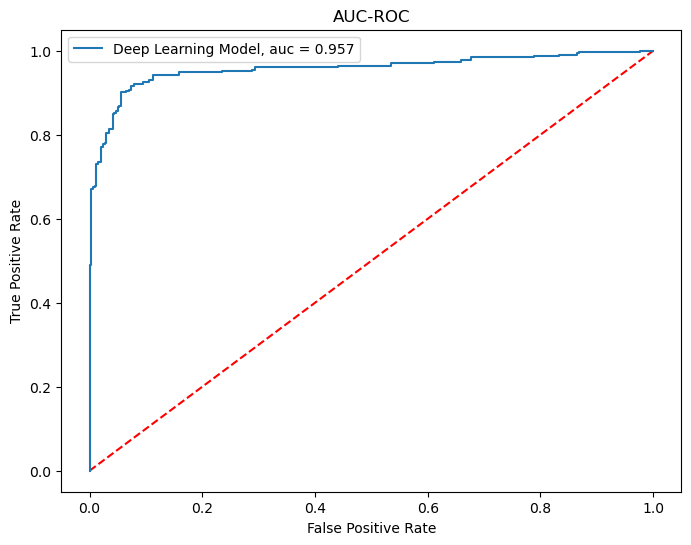

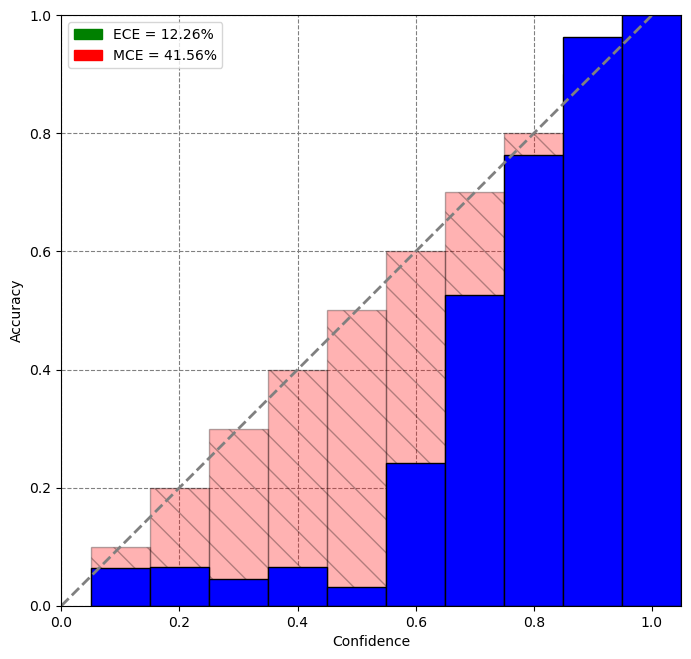

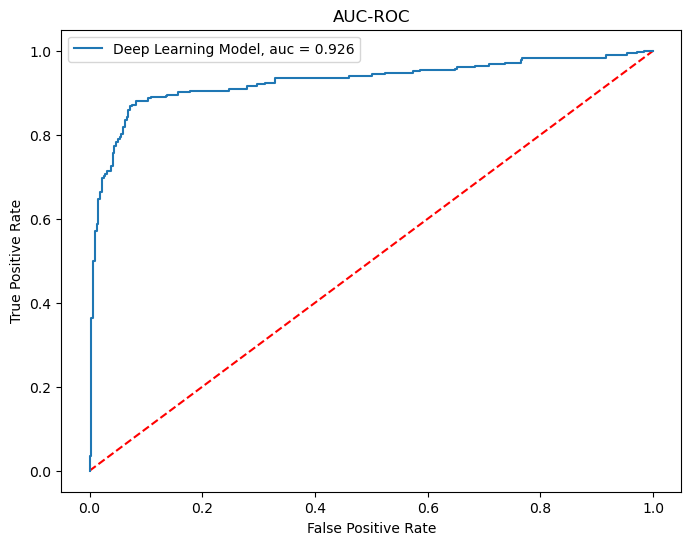

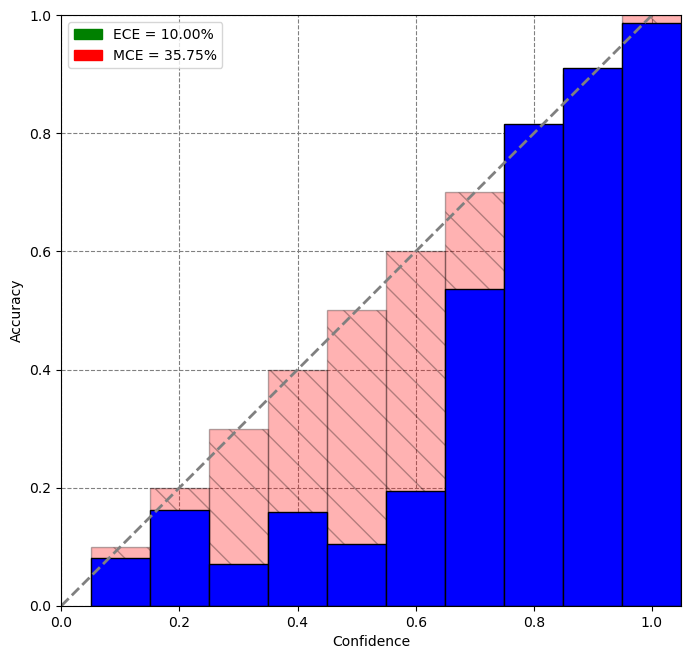

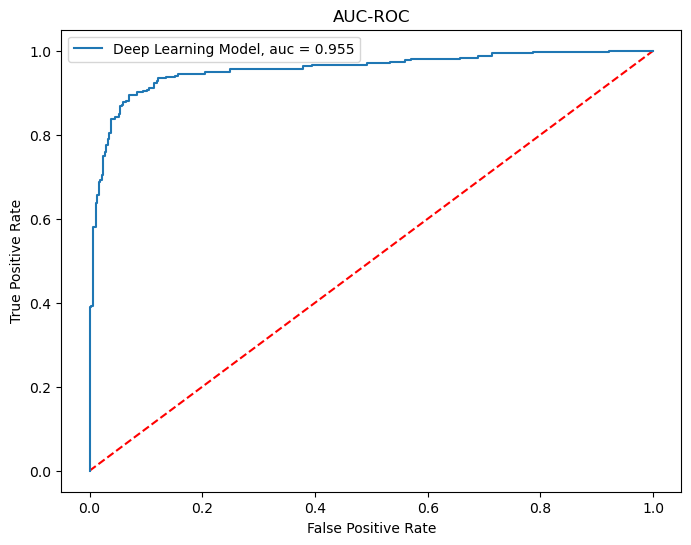

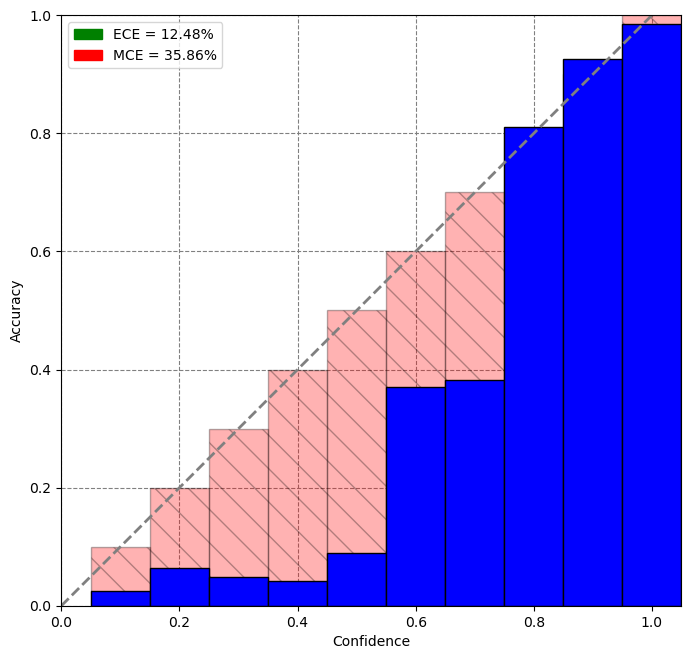

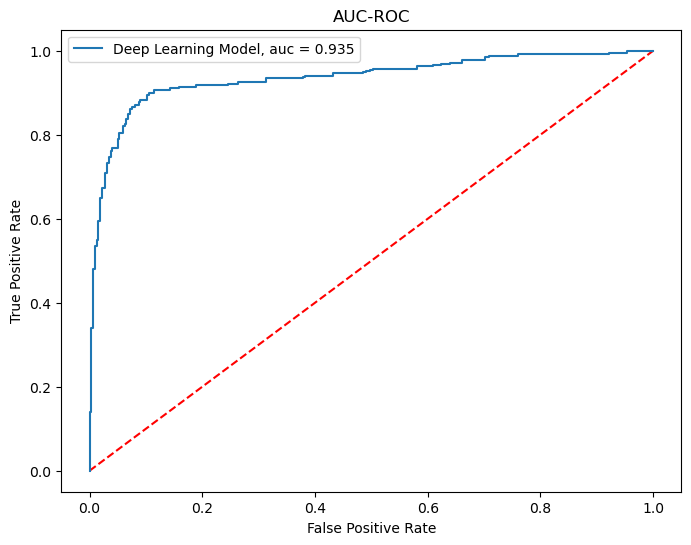

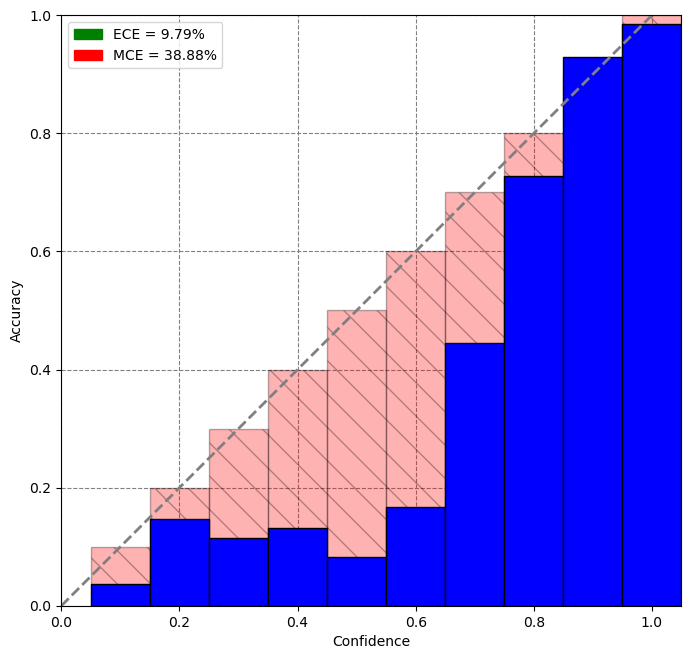

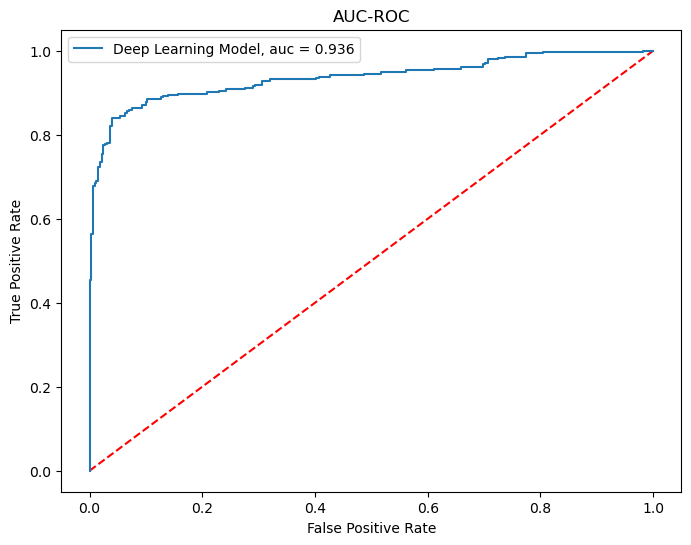

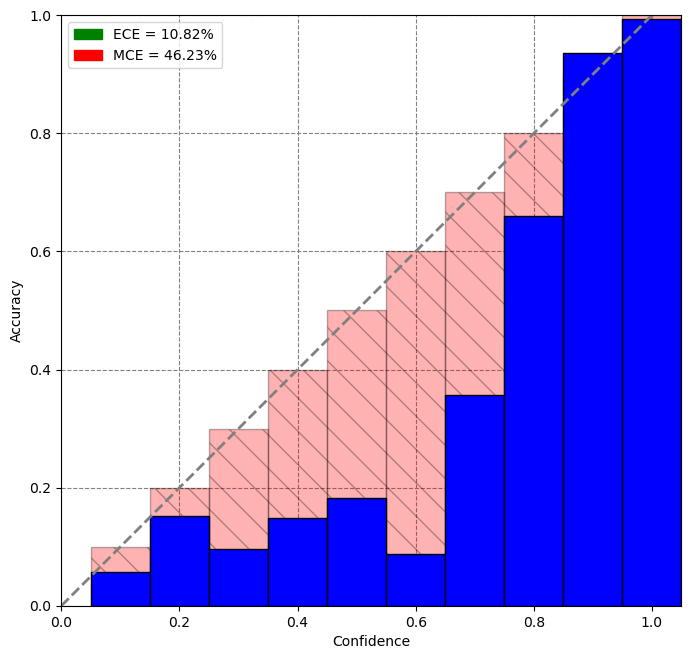

In [17]:
print("Before", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
ml=ml_models.ML_models(config.getAttr('data_icu'),
                       config.getAttr('cv'),
                       config.getAttr('model'),
                       config.getAttr('concat'),
                       config.getAttr('oversampling')
                      )
print("After", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

In [ ]:
dl_model="Time-series CNN"
config.setAttr('dl_model', dl_model)
dl_cv=5
config.setAttr('dl_cv', dl_cv)
dl_oversampling=True
config.setAttr('dl_oversampling', dl_oversampling)
config.getall()

## 9. Deep Learning Models
- Time-series LSTM and Time-series CNN which will only use time-series events like medications, charts, labs, output events to train model.

- Hybrid LSTM and Hybrid CNN will use static data - diagnosis, demographic data aong with other time-series data to train model.

- LSTM with Attention model will use attention layer to rank the important features and learn to predict output. It will use both static and time-series data.

**Go to ./model/parameter.py and define all variables needed for model building and training**

**Please run below cell to select which model to use**

In [ ]:
print("Before", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
if config.getAttr('data_icu'):
    model=dl_train.DL_models(config.getAttr('data_icu'),
                             config.getAttr('diag_flag'),
                             config.getAttr('proc_flag'),
                             config.getAttr('out_flag'),
                             config.getAttr('chart_flag'),
                             config.getAttr('med_flag'),
                             False,
                             config.getAttr('dl_model'),
                             config.getAttr('dl_cv'),
                             config.getAttr('dl_oversampling'),
                             model_name='attn_icu_read',
                             train=True)
else:
    model=dl_train.DL_models(config.getAttr('data_icu'),
                             config.getAttr('diag_flag'),
                             config.getAttr('proc_flag'),
                             False,
                             False,
                             config.getAttr('med_flag'),
                             config.getAttr('lab_flag'),
                             config.getAttr('dl_model'),
                             config.getAttr('dl_cv'),
                             config.getAttr('dl_oversampling'),
                             model_name='attn_icu_read',
                             train=True)
print("After", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

## 10. Running BEHRT
Below we integrate the implementation of BEHRT in our pipeline.
We perform pre-procesing needed to run BEHRT model. https://github.com/deepmedicine/BEHRT

Few things to note before running BEHRT -
- The numerical values are binned into quantiles.
- BEHRT has recommended maximum number of events per sample to be 512. 
    So feature selection is important so that number of events per sample does not exceed 512.
- The model is quite computationally heavy so it requires a GPU.

The output files for BEHRT will be saved in ./data/behrt/ folder

**Please run below cell to to pre-process and run BEHRT on the selected cohort**

In [ ]:

if config.getAttr('data_icu'):
    tokenized_src, tokenized_age, tokenized_gender, tokenized_ethni, tokenized_ins, tokenized_labels=BEHRT_models(config.getAttr('data_icu'),
                                                                   config.getAttr('diag_flag'),
                                                                   config.getAttr('proc_flag'),
                                                                   config.getAttr('out_flag'),
                                                                   config.getAttr('chart_flag'),
                                                                   config.getAttr('med_flag'),
                                                                   False
                                                                  )
else:
    tokenized_src, tokenized_age, tokenized_gender, tokenized_ethni, tokenized_ins, tokenized_labels=BEHRT_models(config.getAttr('data_icu'),
                                                                   config.getAttr('diag_flag'),
                                                                   config.getAttr('proc_flag'),
                                                                   False,
                                                                   False,
                                                                   config.getAttr('med_flag'),
                                                                   config.getAttr('lab_flag')
                                                                  )
    
behrt_train.train_behrt(tokenized_src, 
                        tokenized_age, 
                        tokenized_gender, 
                        tokenized_ethni, 
                        tokenized_ins, 
                        tokenized_labels)

### EVALUATION AS STANDALONE MODULE
Below cell shows an exaple of how evaluation module can be used as a standalone module.

evaluation.Loss class can be instantiated and model output and ground truth can be passed to it to obtain results.

In the example below we captured model output and ground truth in a file and used that file to read the data.

In function definition ***loss(prob,truth,logits,False)***

prob -> List of Output predicted probabilities of case being positive

truth -> List of ground truth labels

logits -> List of logits obtained from last fully connected layer before applying softmax.sigmoid function in the model.

In [ ]:
if torch.cuda.is_available():
    device='cuda:0'
device='cpu'
loss=evaluation.Loss(device,acc=True,ppv=True,sensi=True,tnr=True,npv=True,auroc=True,aurocPlot=True,auprc=True,auprcPlot=True,callb=True,callbPlot=True)
with open("./data/output/outputDict", 'rb') as fp:
    outputDict=pickle.load(fp)
prob=list(outputDict['Prob'])
truth=list(outputDict['Labels'])
logits=list(outputDict['Logits'])
#print(torch.tensor(prob))
print("======= TESTING ========")
loss(prob,truth,logits,train=False,standalone=True)


### 11. FAIRNESS EVALUATION
In train and testing step we save output files in **./data/output/** folder.

This file conatins list of demographic variables included in training and testing of the model.

It also contains the ground truth labels and predicted probability for each sample.

We use the above saved data to perform fairness evaluation of the results obtained from model testing.

This module can be used as stand-alone module also.

Please create a file that contains predicted probabilites form the last sigmoid layer in column named **Prob** and
ground truth labels for each sample in column named **Labels**.

In [ ]:
fairness.fairness_evaluation(inputFile='outputDict',outputFile='fairnessReport')

### 12. MODEL CALLIBRATION

Please run below cell if you want to callibrate predicted probabilites of the model on test data.
It will use the output saved during the testing of the model.

The file is saved in **./data/output/**.

This module can be used as stand-alone module also.

Please create a file that contain predicted logits form the last fully connected layer in column named **Logits** and <br>ground truth labels for each sample in a column named **Labels**.

In [ ]:
callibrate_output.callibrate(inputFile='outputDict',outputFile='callibratedResults')